In [67]:
import pandas as pd 
import sklearn
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [5]:
df = pd.DataFrame({
    'Names' :['Alvin','Osvin','Nathan','Ryan'],
    'Music':['Jazz','Rap','Pop',d'Country'],
    'Songs':[12,25,19,32]
})

In [6]:
df

,Names,Music,Songs
0,Alvin,Jazz,12
1,Osvin,Rap,25
2,Nathan,Pop,19
3,Ryan,Country,32


In [9]:
df['Music'][2]

'Pop'

In [11]:
df[df['Songs'] > 20]

,Names,Music,Songs
1,Osvin,Rap,25
3,Ryan,Country,32


In [15]:
df= pd.concat([df,df])

In [18]:
df.head(7)

,Names,Music,Songs
0,Alvin,Jazz,12
1,Osvin,Rap,25
2,Nathan,Pop,19
3,Ryan,Country,32
0,Alvin,Jazz,12
1,Osvin,Rap,25
2,Nathan,Pop,19


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df

,Names,Music,Songs
0,Alvin,Jazz,12
1,Osvin,Rap,25
2,Nathan,Pop,19
3,Ryan,Country,32


In [26]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)

In [27]:
df

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
df[df['petal-length'] > 2]

,sepal-length,sepal-width,petal-length,petal-width,class
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [34]:
df.shape

(150, 5)

In [35]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
df.groupby('class').()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


<AxesSubplot:>

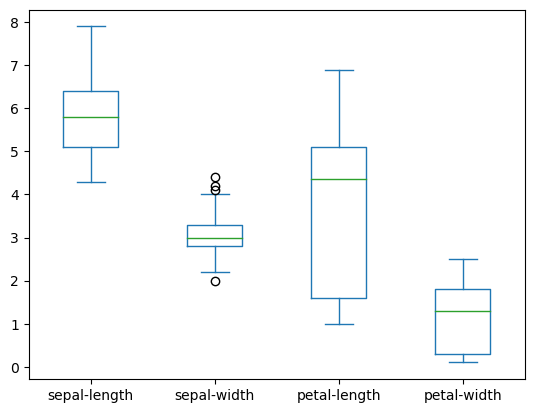

In [48]:
df.plot(kind='box')

array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

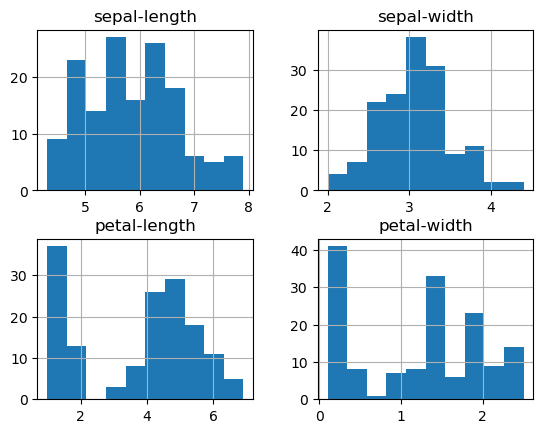

In [49]:
df.hist()

In [51]:
array = df.values

In [56]:
X = array[:,0:4]
Y = array[:,4]

In [60]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=.20)

In [63]:
knn = KNeighborsClassifier()

In [64]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [68]:
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.9333333333333333


/Users/alvinalaphat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [69]:
print(classification_report(Y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.86      0.86      0.86         7

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30

